#### Clustering analysis and customer segmentation for Retail data

##### Step1: import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

##### Step2: Import Dataset

In [2]:
df = pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


#### Step 3: Data Exploration and Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#1: Drop Nulls
df.dropna(inplace=True)
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,14-11-2011 15:27,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15152.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


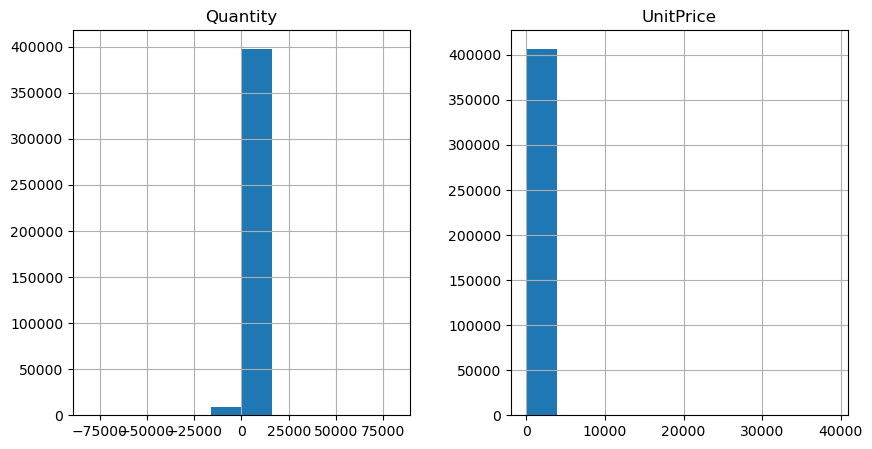

In [6]:
df[['Quantity','UnitPrice']].hist(figsize=(10,5))
plt.show()


##### We can see that Quantity has negative values, which indicates sum returns. This might affect the data, so we will remove them

In [7]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [8]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,397884,397884,397884,397884.000000,397884,397884.000000,397884.000000,397884
unique,18532,3665,3877,NaN,17282,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,14-11-2011 15:27,NaN,NaN,United Kingdom
freq,542,2035,2028,NaN,542,NaN,NaN,354321
mean,NaN,NaN,NaN,12.988238,NaN,3.116488,15294.423453,NaN
std,NaN,NaN,NaN,179.331775,NaN,22.097877,1713.141560,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15159.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16795.000000,NaN


In [9]:

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
#Change Invoice to date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')


In [11]:
#Customer Total amount spend
df['Total_Amount_Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total_Amount_Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total_Amount_Spent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [110]:
#df.drop(columns=['Day_of_Week_Name', 'Day_of_Week_Integer'], inplace=True)


In [12]:
# Create additional column 'Day_of_Week_Integer'
df['Day_of_Week_Integer'] = df['InvoiceDate'].dt.dayofweek  # Adding 1 to start from 1 for Sunday
df['Month'] = df['InvoiceDate'].dt.month
df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()


df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Month,Day_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,Wednesday


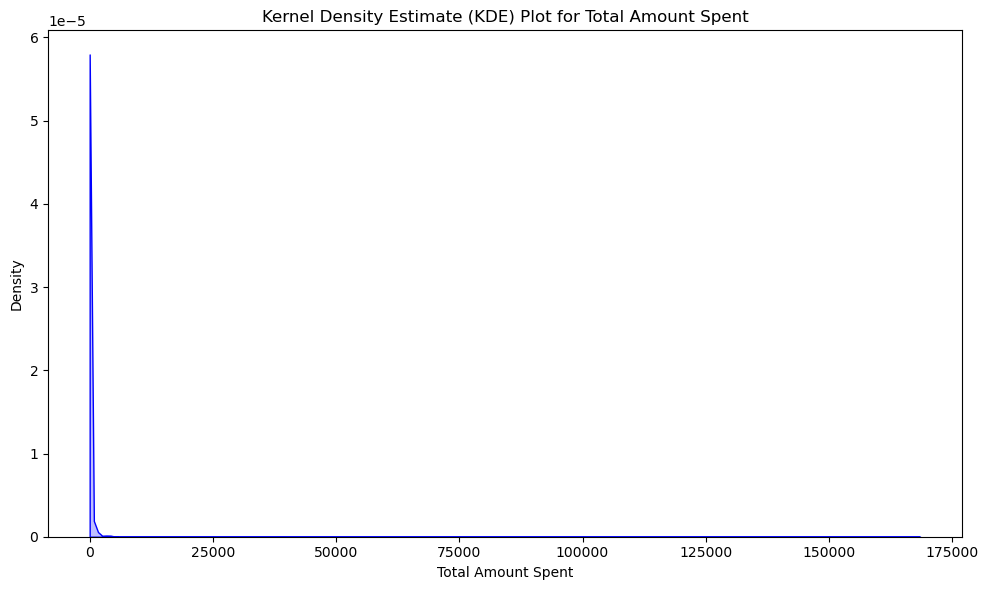

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Total_Amount_Spent'], shade=True, color='blue')
plt.title('Kernel Density Estimate (KDE) Plot for Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

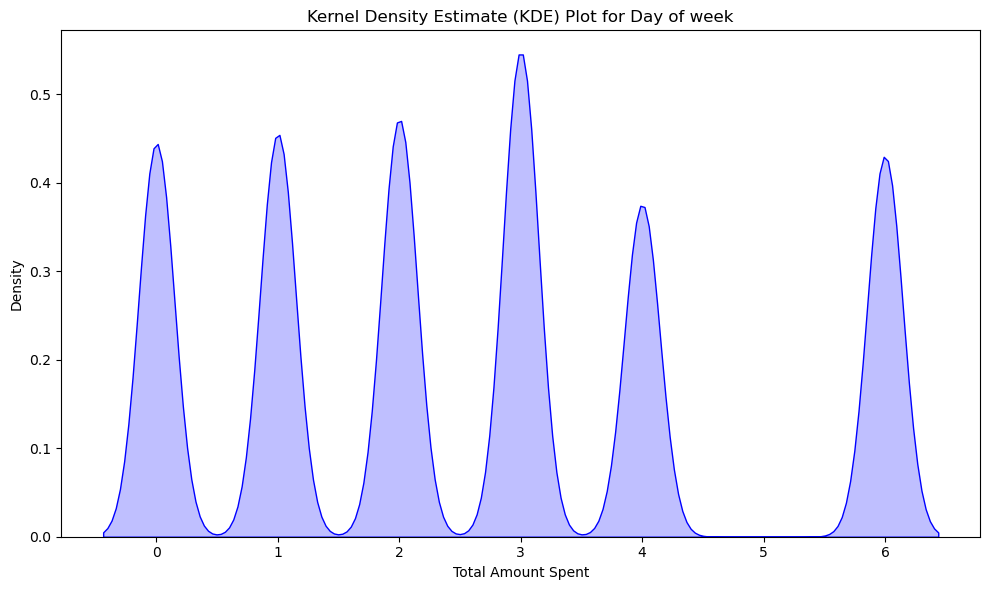

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Day_of_Week_Integer'], shade=True, color='blue')
plt.title('Kernel Density Estimate (KDE) Plot for Day of week')
plt.xlabel('Total Amount Spent')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [15]:
distinct_day_of_week = df[['Day_of_Week_Integer', 'Day_of_Week']].drop_duplicates().reset_index(drop=True)
print(distinct_day_of_week)

   Day_of_Week_Integer Day_of_Week
0                    2   Wednesday
1                    3    Thursday
2                    4      Friday
3                    6      Sunday
4                    0      Monday
5                    1     Tuesday


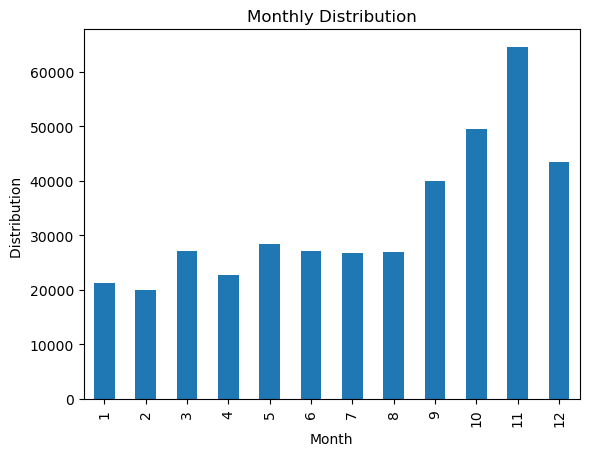

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
yearly_counts = df['InvoiceDate'].dt.year.value_counts().sort_index()
month_counts = df['InvoiceDate'].dt.month.value_counts().sort_index()

month_counts.plot(kind='bar')
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Distribution ')
plt.show()

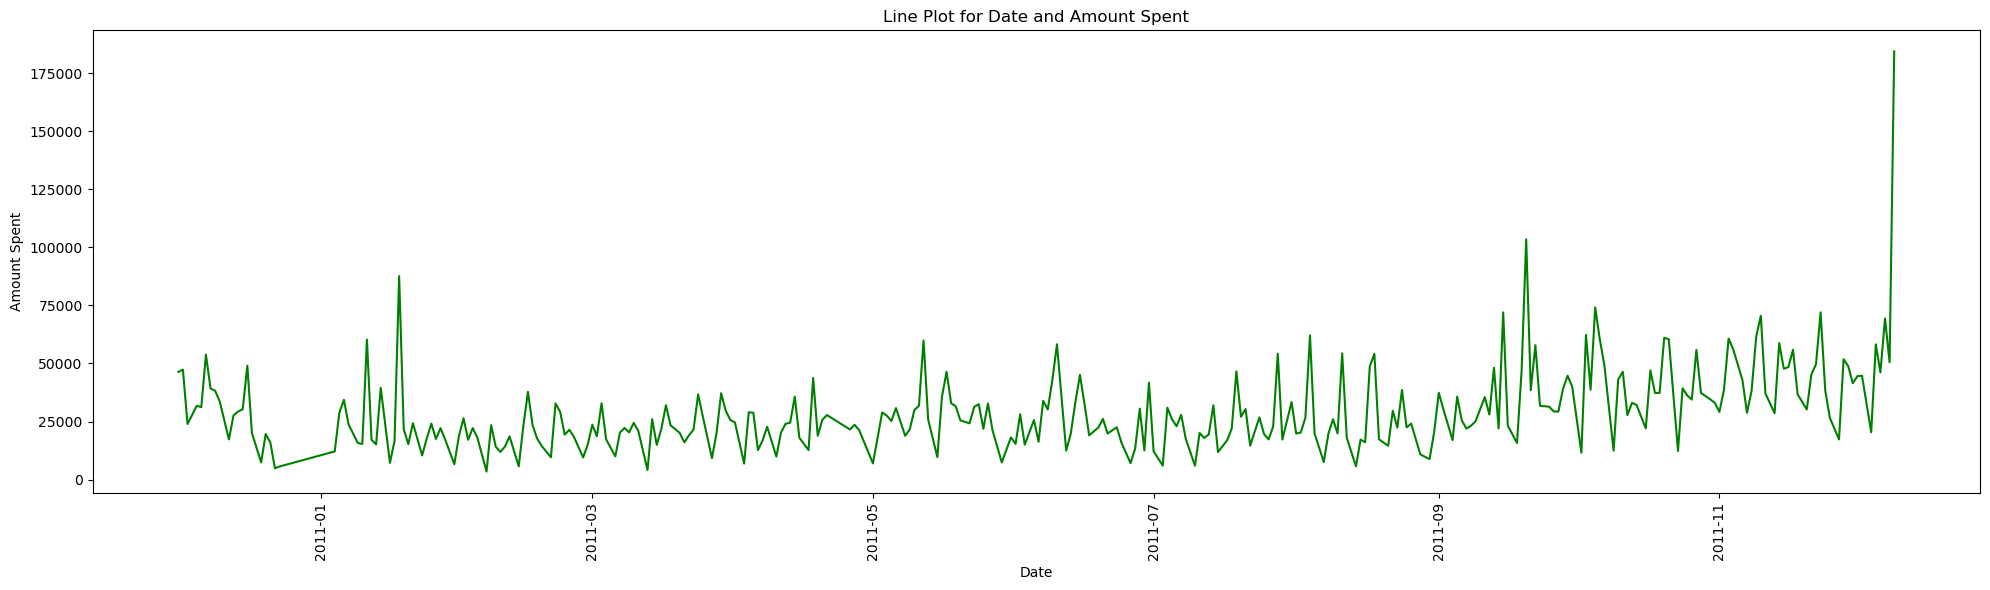

In [17]:
# Line plot for Date and Amount Spent

Daily_spend = df.groupby(df['InvoiceDate'].dt.date)['Total_Amount_Spent'].sum().reset_index()

Daily_spend = pd.DataFrame(Daily_spend).reset_index()
Daily_spend = Daily_spend.sort_values(by='InvoiceDate')

plt.figure(figsize=(20, 6))
#plt.plot(Daily_spend['InvoiceDate'], Daily_spend['Total_Amount_Spent'], marker='o', color='blue', linestyle='-')
plt.plot(Daily_spend['InvoiceDate'], Daily_spend['Total_Amount_Spent'], color='green', linestyle='-')

plt.title('Line Plot for Date and Amount Spent')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
### Country Group Spend
total_spending = df['Total_Amount_Spent'].sum()

Country_spend = df['Total_Amount_Spent'].groupby(df['Country']).sum()
Country_spend = pd.DataFrame(Country_spend).reset_index()

Country_spend['Percent_spend'] = ((Country_spend['Total_Amount_Spent'] / total_spending) * 100).round(2).astype(str) + '%'
#Country_spend = pd.DataFrame(Country_spend, Percent_spend).reset_index()

Country_spend.head()

,Country,Total_Amount_Spent,Percent_spend
0,Australia,138521.31,1.55%
1,Austria,10198.68,0.11%
2,Bahrain,548.40,0.01%
3,Belgium,41196.34,0.46%
4,Brazil,1143.60,0.01%


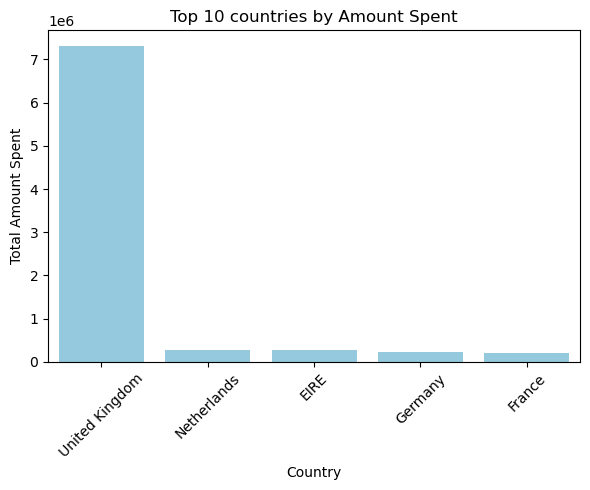

In [21]:
# Bar plots
plt.figure(figsize=(6, 5))
top_10_Countries = df.groupby('Country')['Total_Amount_Spent'].sum().nlargest(5).reset_index()
sns.barplot(data=top_10_Countries, x='Country', y='Total_Amount_Spent', color='skyblue')

#sns.barplot(data=Country_spend, x='Country', y='Percent_spend', color='green')

plt.title('Top 10 countries by Amount Spent')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()


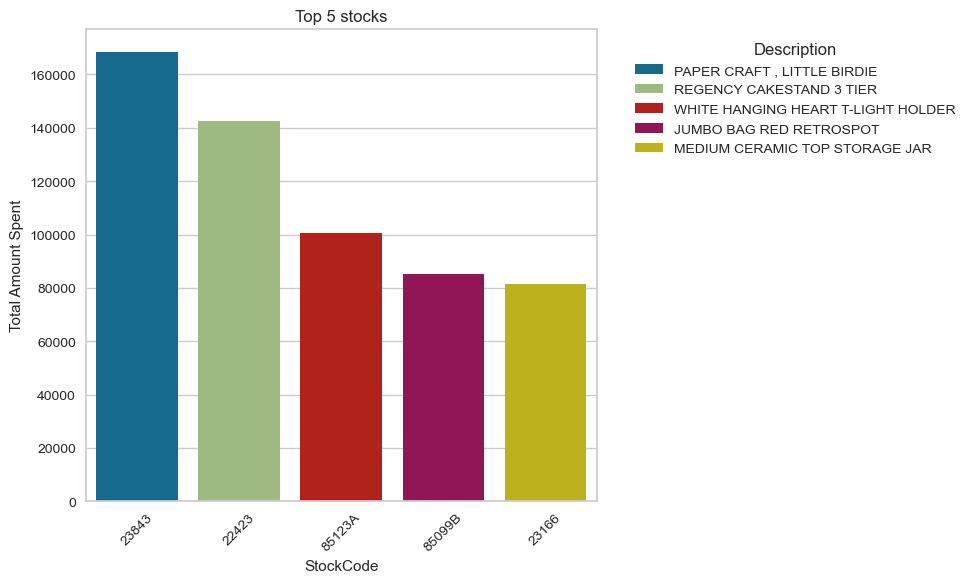

In [52]:
# Sort the DataFrame by 'Total_Amount_Spent' in descending order
df_sorted = df.sort_values(by='Total_Amount_Spent', ascending=False)

# Group by StockCode and sum Total_Amount_Spent, including Description
top_10_stock_codes = df_sorted.groupby(['StockCode', 'Description'])['Total_Amount_Spent'].sum().nlargest(5).reset_index()

# Bar plot for top 10 stock codes
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_stock_codes, x='StockCode', y='Total_Amount_Spent', hue='Description', dodge=False)

plt.title('Top 5 stocks')
plt.xlabel('StockCode')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)

# Customize legend to show in a separate box
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
df['CustomerID'] = df['CustomerID'].astype(int)


#### Step 4: Recency frequency Analysis
###### Recency, Frequency, Monetary model (RFM), is a behavior based analysis technique used to segment customers by examining their transaction history

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            397884 non-null  object        
 1   StockCode            397884 non-null  object        
 2   Description          397884 non-null  object        
 3   Quantity             397884 non-null  int64         
 4   InvoiceDate          397884 non-null  datetime64[ns]
 5   UnitPrice            397884 non-null  float64       
 6   CustomerID           397884 non-null  int32         
 7   Country              397884 non-null  object        
 8   Total_Amount_Spent   397884 non-null  float64       
 9   Day_of_Week_Integer  397884 non-null  int32         
 10  Month                397884 non-null  int32         
 11  Day_of_Week          397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5)
memory usage:

###### Step 4a: Recency

In [29]:
last_transaction_date = df.groupby('CustomerID')['InvoiceDate'].max()

reference_date = max(df['InvoiceDate'])
last_transaction_date = pd.to_datetime(last_transaction_date)

days_difference = pd.DataFrame((reference_date - last_transaction_date).dt.days).reset_index()
days_difference = days_difference.rename(columns={'InvoiceDate': 'recency'})


days_difference.head()

,CustomerID,recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


###### Step 4b: Frequency

In [30]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency = frequency.rename(columns={'InvoiceNo': 'frequency'})

frequency.head()

,CustomerID,frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


###### Step 4c: Spend

In [31]:
#### Spend
Spend = df.groupby('CustomerID')['Total_Amount_Spent'].sum()
Spend = Spend.reset_index()
Spend = Spend.rename(columns={'Total_Amount_Spent': 'Spend'})

Spend.head()


,CustomerID,Spend
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [32]:
#COmbining Recency frequency and Spend 
merged_rfs = days_difference.merge(frequency, on='CustomerID', how='inner')

merged_rfs = merged_rfs.merge(Spend, on='CustomerID', how='inner')

print(merged_rfs.head())

   CustomerID  recency  frequency     Spend
0       12346      325          1  77183.60
1       12347        1        182   4310.00
2       12348       74         31   1797.24
3       12349       18         73   1757.55
4       12350      309         17    334.40


##### Step 5: Outllier Analysis for RFS

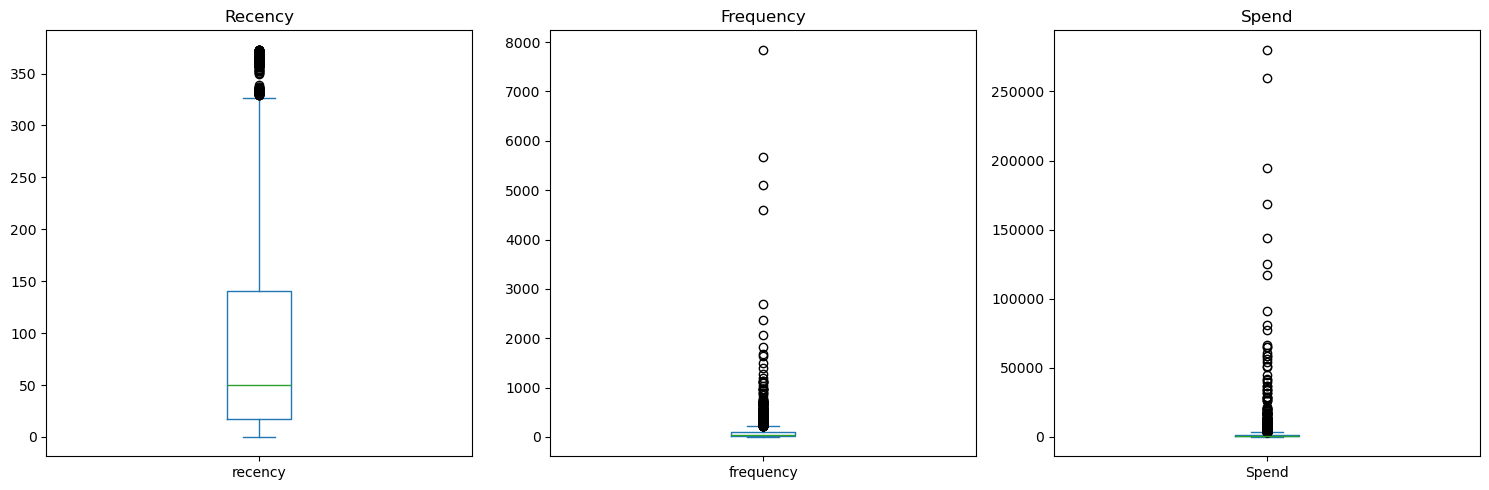

In [33]:
#merged_rfs[['recency', 'frequency', 'Spend']].boxplot()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for each feature
merged_rfs['recency'].plot(kind='box', ax=axes[0])
axes[0].set_title('Recency')

merged_rfs['frequency'].plot(kind='box', ax=axes[1])
axes[1].set_title('Frequency')

merged_rfs['Spend'].plot(kind='box', ax=axes[2])
axes[2].set_title('Spend')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

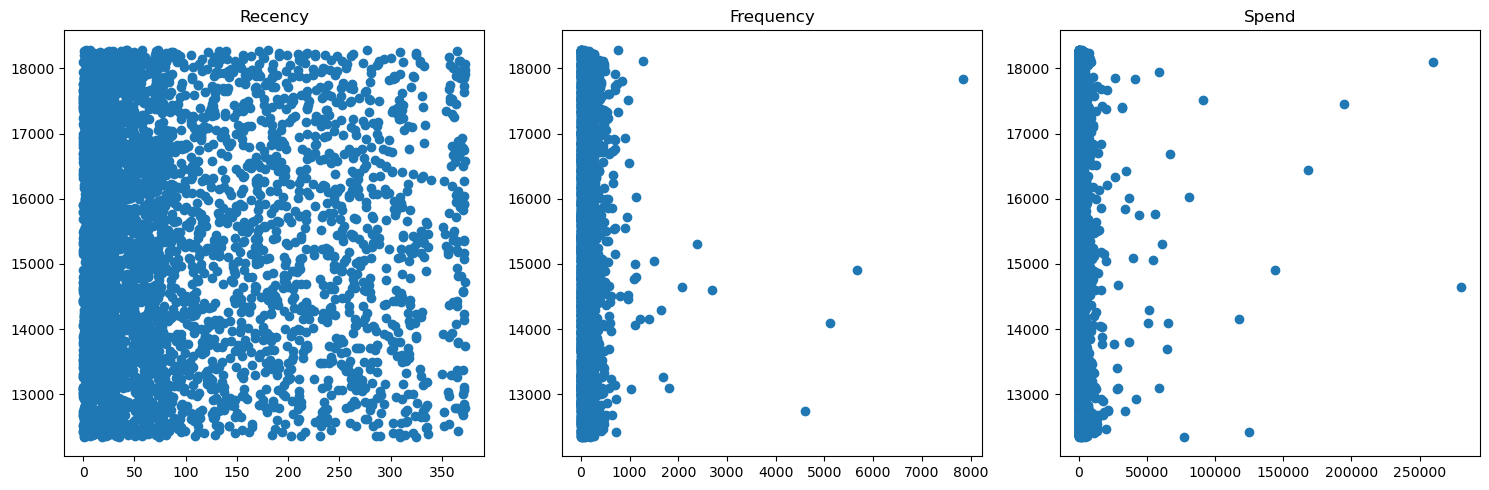

In [34]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for each rfs
axes[0].scatter(merged_rfs['recency'], merged_rfs['CustomerID'])
axes[0].set_title('Recency')

axes[1].scatter(merged_rfs['frequency'], merged_rfs['CustomerID'])
axes[1].set_title('Frequency')

axes[2].scatter(merged_rfs['Spend'], merged_rfs['CustomerID'])
axes[2].set_title('Spend')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
# Calculate z-scores for each feature
z_scores = (merged_rfs[['recency', 'frequency', 'Spend']] - merged_rfs[['recency', 'frequency', 'Spend']].mean()) / merged_rfs[['recency', 'frequency', 'Spend']].std()

# First defined thresholds for identifying outliers
threshold_recency = 3
threshold_frequency = 3
threshold_spend = 3

# Find outliers for each feature
outliers_recency = z_scores['recency'].abs() > threshold_recency
outliers_frequency = z_scores['frequency'].abs() > threshold_frequency
outliers_spend = z_scores['Spend'].abs() > threshold_spend

# Combining outlier flags across RFS features
outliers = outliers_recency | outliers_frequency | outliers_spend

# Printing the indices of the outliers
print("Indices of outliers:")
print(merged_rfs[outliers].index)

# Print the number of outliers per feature
print("\nNumber of outliers per feature:")
print("Recency:", outliers_recency.sum())
print("Frequency:", outliers_frequency.sum())
print("Spend:", outliers_spend.sum())



Indices of outliers:
Index([   0,   55,  326,  453,  558,  562,  690,  996, 1069, 1262, 1284, 1289,
       1333, 1336, 1434, 1546, 1586, 1602, 1661, 1689, 1779, 1797, 1879, 1937,
       1964, 1983, 2011, 2176, 2358, 2479, 2502, 2517, 2570, 2688, 2702, 2705,
       2990, 3008, 3079, 3176, 3364, 3683, 3693, 3728, 3771, 3992, 4010, 4093,
       4201, 4213],
      dtype='int64')

Number of outliers per feature:
Recency: 0
Frequency: 29
Spend: 31


In [36]:
#Removing Outliers
rfs= merged_rfs[~outliers]
rfs.describe()


,CustomerID,recency,frequency,Spend
count,4288.000000,4288.000000,4288.000000,4288.000000
mean,15300.585354,92.356110,78.545243,1449.070465
std,1723.384514,100.100452,103.069695,2390.334501
min,12347.000000,0.000000,1.000000,3.750000
25%,13809.750000,17.000000,17.000000,305.717500
50%,15302.000000,51.000000,41.000000,662.485000
75%,16781.250000,143.000000,98.000000,1605.327500
max,18287.000000,373.000000,756.000000,28882.440000


##### Step 6: Feature Scaling before Clustering

In [37]:
from sklearn.preprocessing import StandardScaler
X=rfs.iloc[:,1:]

scaler = StandardScaler()
X = scaler.fit_transform(X)
#scaled_RFS.head(5)
X

array([[-0.91275076,  1.003853  ,  1.19701372],
       [-0.18339828, -0.46134596,  0.14567423],
       [-0.74290156, -0.05380718,  0.12906792],
       ...,
       [-0.85280398, -0.64570874, -0.53179532],
       [-0.8927685 ,  6.57354971,  0.27020689],
       [-0.50311444, -0.08291709,  0.16242698]])

In [38]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

##### Step 7: K-means Clustering

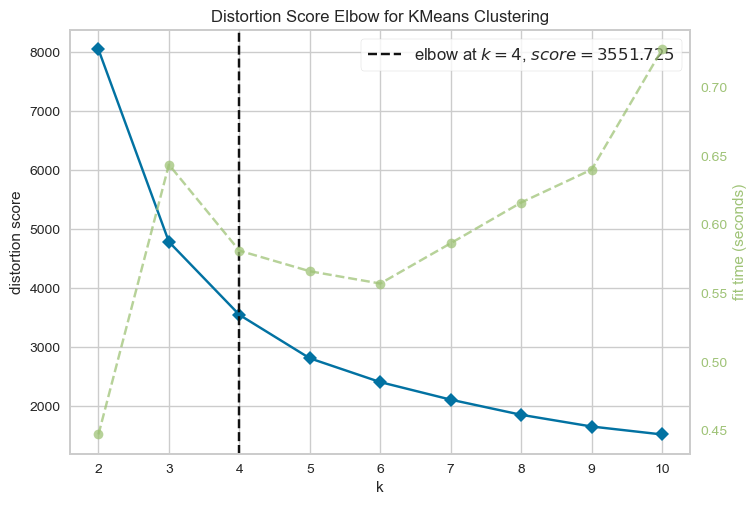

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Instantiate the KMeans model
model = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(model, k=(2,11)) # Range of k values to try

# Fitting  visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()


In [40]:

kmeans= KMeans(n_clusters=4,n_init='auto',random_state=42)

kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [43]:
#print("Inertia:", kmeans.inertia_)


In [44]:
kmeans.predict(X)

array([1, 2, 2, ..., 2, 1, 2])

In [45]:
rfs["Cluster"]=kmeans.labels_
rfs.head()

,CustomerID,recency,frequency,Spend,Cluster
1,12347,1,182,4310.00,1
2,12348,74,31,1797.24,2
3,12349,18,73,1757.55,2
4,12350,309,17,334.40,0
5,12352,35,85,2506.04,2


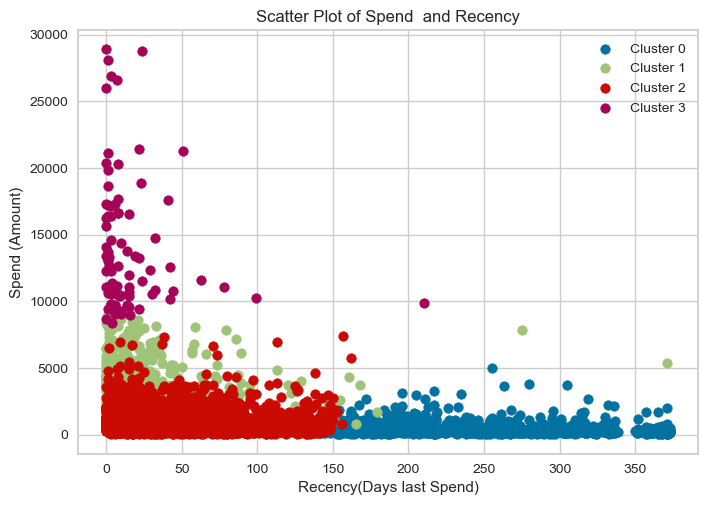

In [46]:
import matplotlib.pyplot as plt

# Group the DataFrame by the 'Cluster' column
grouped = rfs.groupby('Cluster')

#cmap = plt.get_cmap('tab10')  # You can use any colormap available in Matplotlib

# Create a scatter plot for each cluster
for cluster, data in grouped:
    plt.scatter(data['recency'], data['Spend'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Recency(Days last Spend)')
plt.ylabel('Spend (Amount)')
plt.title('Scatter Plot of Spend  and Recency')

# Add legend
plt.legend()

# Show the plot
plt.show()


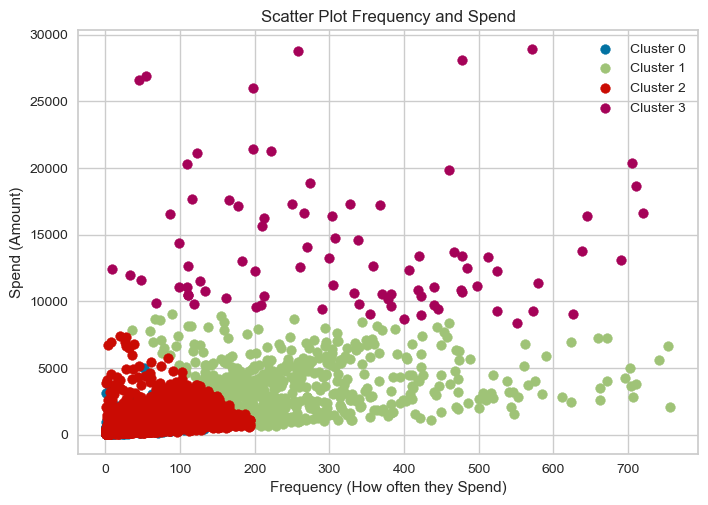

In [47]:
# Create a scatter plot for each cluster
for cluster, data in grouped:
    plt.scatter(data['frequency'], data['Spend'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Frequency (How often they Spend)')
plt.ylabel('Spend (Amount)')
plt.title('Scatter Plot Frequency and Spend')

# Add legend
plt.legend()

# Show the plot
plt.show()


Summary
##### Cluster 0: High recency, low frequency , low Spend
##### Cluster 1: Low recency, High Frequency, moderate Spend
##### Cluster 2: Low Recency, Low Frequency, Low Spend
##### Cluster 3: Low Recency,  High Frequency, High Spend

In [48]:
final_df = pd.merge(df, rfs, on='CustomerID')
final_df.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Month,Day_of_Week,recency,frequency,Spend,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,12,Wednesday,371,297,5391.21,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,12,Wednesday,371,297,5391.21,1


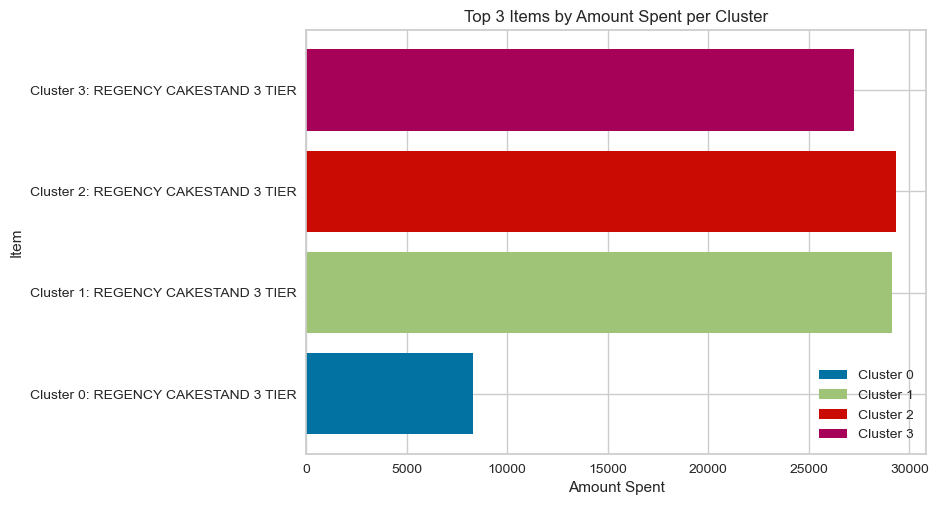

In [49]:
grouped = final_df.groupby('Cluster')

# Initialize a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate over each cluster
for cluster, cluster_data in grouped:
    # Calculate the total amount spent for each item in the cluster
    item_amounts = cluster_data.groupby('Description')['Total_Amount_Spent'].sum()
    
    # Sort the items by total amount spent and select the top 3 items
    top_items = item_amounts.sort_values(ascending=False).head(1)
    
    # Plot the top items for the cluster
    ax.barh([f'Cluster {cluster}: {item}' for item in top_items.index], top_items.values, label=f'Cluster {cluster}')

# Add labels and title
ax.set_xlabel('Amount Spent')
ax.set_ylabel('Item')
ax.set_title('Top 3 Items by Amount Spent per Cluster')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [50]:
final_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Amount_Spent',
       'Day_of_Week_Integer', 'Month', 'Day_of_Week', 'recency', 'frequency',
       'Spend', 'Cluster'],
      dtype='object')

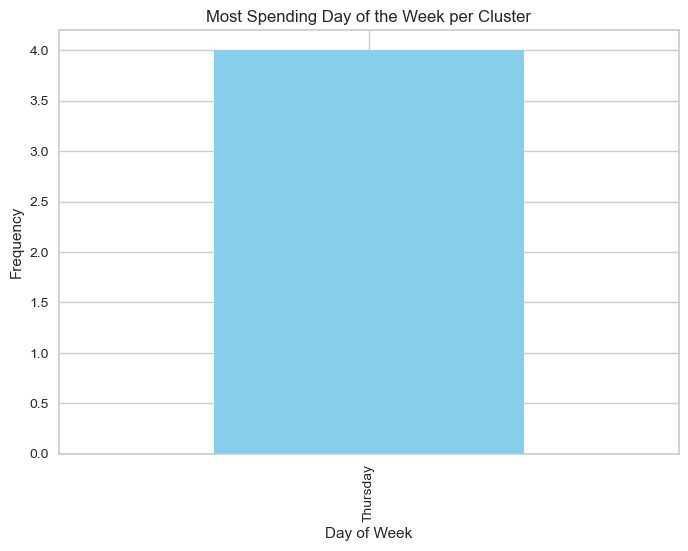

Cluster 0: Thursday
Cluster 1: Thursday
Cluster 2: Thursday
Cluster 3: Thursday


In [51]:
# Group the DataFrame by 'Cluster' and 'day_of_week' and sum the amount spent
grouped = final_df.groupby(['Cluster', 'Day_of_Week'])['Total_Amount_Spent'].sum()

# Find the day of the week with the maximum total amount spent for each cluster
max_spending_day = grouped.groupby('Cluster').idxmax()

# Convert the result to a DataFrame
max_spending_day_df = pd.DataFrame(max_spending_day.values.tolist(), columns=['Cluster', 'Day of Week'])

# Count the occurrences of each day of the week
day_counts = max_spending_day_df['Day of Week'].value_counts()

# Plot the bar chart
day_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Most Spending Day of the Week per Cluster')

# Show the plot
plt.show()


# Print the result
for cluster, day in max_spending_day:
    print(f"Cluster {cluster}: {day}")